In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

#scaling and train-test split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, learning_curve

#models to review
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

#crossvalidation methods

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

#metrics to review
from sklearn.metrics import (make_scorer, recall_score, precision_score,
f1_score, roc_auc_score, accuracy_score, roc_curve, classification_report, confusion_matrix)

#dealing with SMOTE techniques
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split, RandomizedSearchCV

#import helper file py
import nbimporter
from dataclean import *

#autoreload python file
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#neatness
%matplotlib inline

import datetime
import itertools

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#import csv data 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data cleaning and inital EDA

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#df.info()

In [5]:
#reorder columns
column_names = ['Class', 'Amount','Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

df = df.reindex(columns=column_names)
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

In [6]:
# number of fraud cases to equalize subsample proportions
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#assess Target column's balance
n = "\n"
normal_percent = df['Class'].value_counts()[0] / len(df)
fraud_percent = df['Class'].value_counts()[1] / len(df)
print(f"Percentage of instances of normal transactions: \
{normal_percent}\n{n}Percentages of instances of fraud transactions: {fraud_percent}")

Percentage of instances of normal transactions: 0.9982725143693799

Percentages of instances of fraud transactions: 0.001727485630620034


In [8]:
#scale the last two columns that need to be modified
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
#create under-sampled dataframe balanced
df = df.sample(frac=1)

fraud_under = df[df['Class'] == 1]
nonfraud_under = df[df['Class'] == 0][:492]

df_under = pd.concat([fraud_under, nonfraud_under])

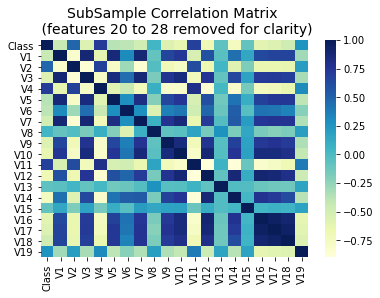

In [10]:
#correlation heatmap on subsample
df_corr = df_under.iloc[:,:20]
under_corr = df_corr.corr()

sns.heatmap(under_corr, cmap='YlGnBu')
plt.title('SubSample Correlation Matrix \n (features 20 to 28 removed for clarity)', fontsize=14);
# plt.savefig('subsample_heatmap')

In [11]:
#pairplot to see other relationships
# sns.pairplot(df_corr, palette='YlGnBu', corner=True, diag_kind='kde', kind='reg', markers='*', 
#                  plot_kws={'line_kws':{'color':'black', 'alpha':0.5}}, height=1.5);

In [12]:
#prep matricies of features for plotting

feature_v14 = df_under['V14'].loc[df_under['Class'] == 1].values
feature_v8 = df_under['V8'].loc[df_under['Class'] == 1].values
feature_v20 = df_under['V20'].loc[df_under['Class'] == 1].values

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence f

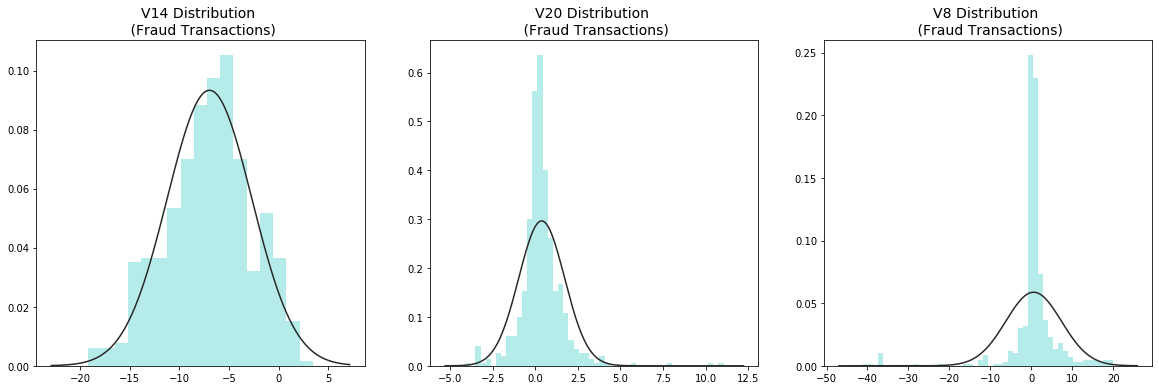

In [13]:
# distributions of specific features
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

sns.distplot(feature_v14, ax=ax1, fit= norm, kde=False, color='mediumturquoise')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v20, ax=ax2, fit= norm, kde=False, color='mediumturquoise')
ax2.set_title('V20 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v8, ax=ax3, fit= norm, kde=False, color='mediumturquoise')
ax3.set_title('V8 Distribution \n (Fraud Transactions)', fontsize=14);

In [14]:
df_under.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
6472,1,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,-0.349231,-1.833595
106998,1,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,-0.338077,-0.517706
147548,1,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,...,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,-0.348512,-0.129335
154587,1,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,...,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,-0.353229,0.153726
150647,1,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,...,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,-0.319086,-0.020844


## Initial training on under sampled data

### Train on the following:
+ Logisitic Regression
+ K Neighbors Classifier
+ Decision Trees Classifier
+ Random Forest Classifier
+ Gradient Boosting Classifier


### using cross validation 5 folds

In [15]:
#establish X values as feature matrix and y as target array
X = df_under.drop('Class', axis = 1).values
y = df_under['Class'].values

# test train split for undersampling. DO NOT EVER TOUCH TEST ITEMS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LogisticRegression().fit(X_train, y_train)

lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_train_score.mean()

0.9415696574650054

In [17]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

dt_train_score = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_train_score.mean()


0.9020862405083964

In [18]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_train_score.mean()

0.9364416590692493

In [19]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_train_score.mean()

0.9364902411947481

In [20]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

gb_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_train_score.mean()

0.9313865338617415

### move this helper function to PY file

In [21]:
class_models = {'gbc': GradientBoostingClassifier(),'rf': RandomForestClassifier(),'knn': KNeighborsClassifier(),
                'dt': DecisionTreeClassifier(), 'lr': LogisticRegression()}

def cross_valid_score(class_models, X_train, y_train, cv=5):
    d = {}
    final = []
    for kind, model in class_models.items():
       
        model.fit(X_train, y_train)
        training_score = cross_val_score(model, X_train, y_train, cv=5)
        d[kind]= round(float(training_score.mean()),4)
    return d
    

In [22]:
cross_valid_score(class_models, X_train, y_train, cv=5)


{'gbc': 0.9428, 'rf': 0.9352, 'knn': 0.9364, 'dt': 0.9072, 'lr': 0.9416}

### Let's try gridsearching for best parameters

In [23]:
#establish parameter dictionaries for GridSearch
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [7000]}

knn_params = {"n_neighbors": list(range(2,6,1)),
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rf_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

dt_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

gbc_params = {'loss': ('deviance', 'exponential'), 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]}


#### KNN evaluation undersample gridsearch

In [24]:
#KNN scores gridsearch analysis on test data
gridsear_knn = GridSearchCV(KNeighborsClassifier(), knn_params)

gridsear_knn.fit(X_train, y_train)
# best parameters to be used
gridsear_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:


knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_train)

knn_recall = recall_score(y_train, y_pred_knn)
knn_precision = precision_score(y_train, y_pred_knn)
knn_f1 = f1_score(y_train, y_pred_knn)
knn_accuracy = accuracy_score(y_train, y_pred_knn)
print(f'KNN recall score: {knn_recall}\nKNN precision score: {knn_precision} \
    \nKNN f1 score: {knn_f1}\nKNN accuracy score: {knn_accuracy}')



KNN recall score: 0.916030534351145
KNN precision score: 0.9917355371900827     
KNN f1 score: 0.9523809523809524
KNN accuracy score: 0.9542566709021602


#### LogisticRegression evaluation undersample gridsearch

In [26]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_
lr_best = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_train)

lr_recall = recall_score(y_train, y_pred_lr)
lr_precision = precision_score(y_train, y_pred_lr)
lr_f1 = f1_score(y_train, y_pred_lr)
lr_accuracy = accuracy_score(y_train, y_pred_lr)
print(f'LogisticRegression recall score: {lr_recall}\nLogisticRegression  precision score: {lr_precision} \
    \nLogisticRegression  f1 score: {lr_f1}\nLogisticRegression  accuracy score: {lr_accuracy}')

LogisticRegression recall score: 0.926208651399491
LogisticRegression  precision score: 0.9732620320855615     
LogisticRegression  f1 score: 0.9491525423728814
LogisticRegression  accuracy score: 0.9504447268106735


#### DecisionTree evaluation undersample gridsearch

In [28]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_train)

dt_recall = recall_score(y_train, y_pred_dt)
dt_precision = precision_score(y_train, y_pred_dt)
dt_f1 = f1_score(y_train, y_pred_dt)
dt_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'DecisionTree recall score: {dt_recall}\nDecisionTree  precision score: {dt_precision} \
    \nDecisionTree  f1 score: {dt_f1}\nDecisionTree  accuracy score: {dt_accuracy}')

DecisionTree recall score: 0.9389312977099237
DecisionTree  precision score: 0.9341772151898734     
DecisionTree  f1 score: 0.9365482233502538
DecisionTree  accuracy score: 0.9364675984752223


#### RandomForest evaluation undersample gridsearch

In [30]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_train)

rf_recall = recall_score(y_train, y_pred_rf)
rf_precision = precision_score(y_train, y_pred_rf)
rf_f1 = f1_score(y_train, y_pred_rf)
rf_accuracy = accuracy_score(y_train, y_pred_rf)
print(f'RandomForest recall score: {rf_recall}\nRandomForest  precision score: {rf_precision} \
    \nRandomForest  f1 score: {rf_f1}\nRandomForest  accuracy score: {rf_accuracy}')

RandomForest recall score: 0.9389312977099237
RandomForest  precision score: 0.9341772151898734     
RandomForest  f1 score: 0.9365482233502538
RandomForest  accuracy score: 0.9364675984752223


#### GradientBoosting evaluation undersample gridsearch

In [32]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [33]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc_best.fit(X_train, y_train)
y_pred_gbc = gbc_best.predict(X_train)

gbc_recall = recall_score(y_train, y_pred_gbc)
gbc_precision = precision_score(y_train, y_pred_gbc)
gbc_f1 = f1_score(y_train, y_pred_gbc)
gbc_accuracy = accuracy_score(y_train, y_pred_gbc)
print(f'GradientBoosting  recall score: {gbc_recall}\nGradientBoosting precision score: {gbc_precision} \
    \nGradientBoosting f1 score: {gbc_f1}\nGradientBoosting accuracy score: {gbc_accuracy}')

GradientBoosting  recall score: 0.9389312977099237
GradientBoosting precision score: 0.9341772151898734     
GradientBoosting f1 score: 0.9365482233502538
GradientBoosting accuracy score: 0.9364675984752223


In [34]:
lr_yhat = cross_val_predict(lr_best, X_train, y_train, cv=5, method='predict_proba')

knn_yhat = cross_val_predict(knn_best, X_train, y_train, cv=5, method='predict_proba')

dt_yhat = cross_val_predict(dt_best, X_train, y_train, cv=5, method='predict_proba')

rf_yhat = cross_val_predict(rf_best, X_train, y_train, cv=5, method='predict_proba')

gbc_yhat = cross_val_predict(gbc_best, X_train, y_train, cv=5, method='predict_proba')


# lr_yhat = lr_best.predict(X_train)

# knn_yhat = knn_best.predict(X_train)

# dt_yhat = dt_best.predict(X_train)

# rf_yhat = rf_best.predict(X_train)

# gbc_yhat = gbc_best.predict(X_train)

In [35]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_train, lr_yhat[:, 1])

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_train, knn_yhat[:, 1])

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_train, dt_yhat[:, 1])

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_train, rf_yhat[:, 1])

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_train, gbc_yhat[:, 1])

In [36]:
# def roc_auc_score(y_train, y_hat):
    

# roc_auc_score(y_train, lr_yhat)
# roc_auc_score(y_train, knn_yhat)
# roc_auc_score(y_train, dt_yhat)

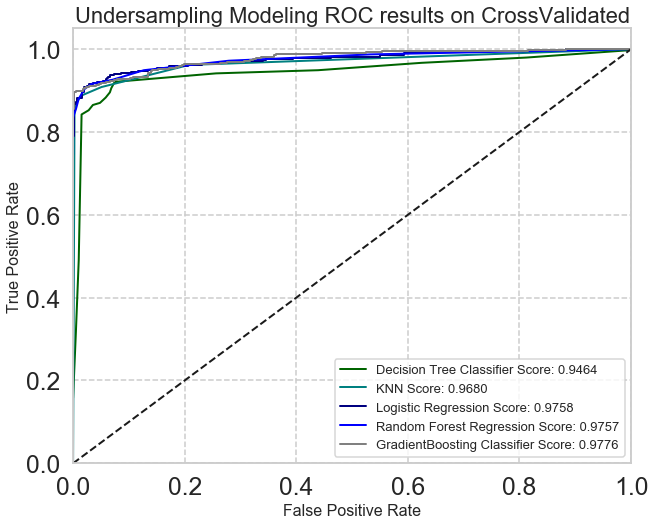

In [70]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


lw = 2
plt.figure(figsize=(10,8))
plt.plot(dt_fpr, dt_tpr, color = 'darkgreen', label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_yhat[:, 1])))
plt.plot(knn_fpr, knn_tpr, color = 'teal', label='KNN Score: {:.4f}'.format(roc_auc_score(y_train, knn_yhat[:, 1])))
plt.plot(lr_fpr, lr_tpr, color = 'navy', label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, lr_yhat[:, 1])))
plt.plot(rf_fpr, rf_tpr, color = 'blue', label='Random Forest Regression Score: {:.4f}'.format(roc_auc_score(y_train, rf_yhat[:, 1])))
plt.plot(gbc_fpr, gbc_tpr, color = 'gray', label='GradientBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gbc_yhat[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(prop={'size':13},loc='lower right')
plt.title('Undersampling Modeling ROC results on CrossValidated', fontsize=22)
plt.show()

# Done with undersampling - back to OG dataset

In [38]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [40]:


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class'].values



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [160]:
#Test train split standard 80 / 20
Xtrainfull, Xtestfull, ytrainfull, ytestfull = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

In [162]:
#LR scores gridsearch analysis on FULL 
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(Xtrainfull, ytrainfull)
# best parameters to be used
gridsear_lr.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

lr_best.fit(Xtrainfull, ytrainfull)
y_pred_lr = lr_best.predict(Xtrainfull)

lr_recall = recall_score(ytrainfull, y_pred_lr)
lr_precision = precision_score(ytrainfull, y_pred_lr)
lr_f1 = f1_score(ytrainfull, y_pred_lr)
lr_accuracy = accuracy_score(ytrainfull, y_pred_lr)
print(f'GradientBoosting  recall score: {lr_recall}\nGradientBoosting precision score: {lr_precision} \
    \nGradientBoosting f1 score: {lr_f1}\nGradientBoosting accuracy score: {lr_accuracy}')

GradientBoosting  recall score: 0.61
GradientBoosting precision score: 0.8501742160278746     
GradientBoosting f1 score: 0.710334788937409
GradientBoosting accuracy score: 0.999126599223156


## Isolation Forest on Original Dataset

In [41]:
df.head(3)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
46348,0,-0.590484,0.853099,1.416504,-0.421532,0.353362,-0.683382,0.670361,0.097574,-0.284073,...,-0.172126,-0.629355,0.009888,-0.018903,-0.447087,-0.054706,0.071186,0.130037,-0.349671,-1.096420
64657,0,-2.511525,-0.687359,0.392609,1.429692,0.321754,1.675456,-0.199509,0.645579,0.388471,...,-0.180861,0.045716,-0.743388,-1.629411,0.052997,-0.101054,-0.177061,-0.009137,0.308454,-0.917364
254445,0,-2.004457,2.111164,-0.657803,-0.190310,0.850672,1.272529,-1.883259,-4.651532,-1.664312,...,-2.829566,-0.216772,-0.022004,-0.305296,0.306942,0.476588,-0.133695,-0.008876,-0.348072,1.303973


In [42]:
X = df.drop('Class', axis=1)
y = df['Class']

In [43]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [44]:
#Test train split standard 80 / 20
og_Xtrain, og_Xtest, og_ytrain, og_ytest = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

## move this to helper function file

In [90]:
def plot_confusion_matrix(cm, title, classes=['anomaly', 'normal'],
                          cmap=plt.cm.Greens, save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize= 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize= 16)
    plt.xlabel('Predicted label', fontsize= 16)
    
    if save:
        plt.savefig(saveas, dpi=100)

In [80]:
# Fit and train Isolation Forest on training data
# this is pretty standard parameters
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.05, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0:00:33.817787


             precision    recall  f1-score   support

          0       1.00      0.95      0.97    227445
          1       0.03      0.86      0.06       400

avg / total       1.00      0.95      0.97    227845

AUC:  90.6%


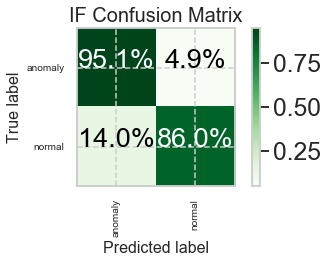

In [91]:

print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix", save=False, saveas="IF_Confusion.png")

In [82]:
cm

array([[216396,  11049],
       [    56,    344]])

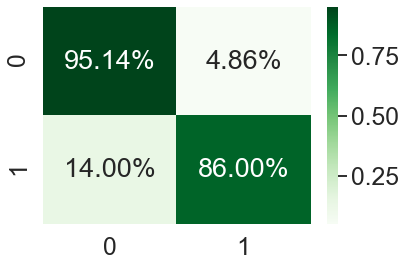

In [93]:
#playing with plotting, which looks better?
import seaborn as sns

cm = confusion_matrix(og_ytrain, y_pred_train)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, 
            fmt='.2%', cmap='Greens');

In [48]:
# this is now with lower contamination rate
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.02, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

0:00:32.332836


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227445
          1       0.07      0.83      0.13       400

avg / total       1.00      0.98      0.99    227845

AUC:  90.4%


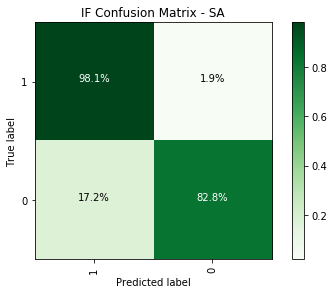

In [49]:
print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="IF Confusion Matrix - SA", save=False, saveas="IF_SA.png")

In [50]:
(unique, counts) = np.unique(og_ytrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies 

array([[     0, 227445],
       [     1,    400]])

In [51]:
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=1)}

In [ ]:

## REVIST THIS TO SEE IF IT WORKS at 4:30pm
# gs_con = GridSearchCV(IsolationForest(random_state=11, max_samples=0.10, n_estimators=150, n_jobs=-1),
#                   param_grid={'contamination': np.arange(0.01, 0.25, 0.05)},
#                   scoring=scoring, refit='Recall')
# gs_con.fit(og_Xtrain, og_ytrain)
# results = gs_con.cv_results_

# PCA analysis - lots of manual

In [130]:
X_pca = df.drop('Class', axis=1).values
y_pca = df['Class'].values

In [131]:
from sklearn import (
    cluster, datasets, 
    decomposition, ensemble, manifold, 
    random_projection, preprocessing)
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
X_pca_scaled = StandardScaler().fit_transform(X_pca);
X_pca_scaled.shape

(284807, 30)

In [146]:

pca = decomposition.PCA(n_components=15)
X_new = pca.fit_transform(X_pca)

In [144]:
def scree_plot(ax, pca, n_components_to_plot=10, title=None):
    """Make a scree plot showing the variance explained (i.e. varaince of the projections) for the principal components in a fit sklearn PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the skree plot.
      
    title: str
      A title for the skree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

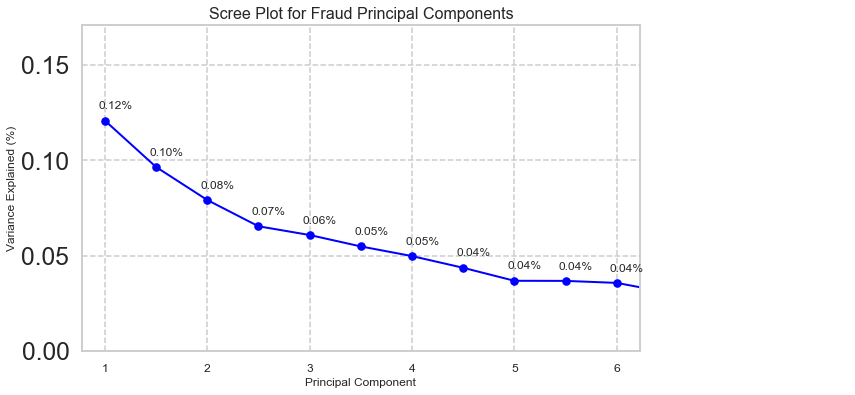

In [147]:
fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Fraud Principal Components")

In [149]:
X_pca = df.drop('Class', axis=1)
y_pca = df['Class']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=2018, stratify=y_pca)

In [ ]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [151]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [ ]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

In [ ]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [ ]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))

## manual results